## Finding the avergae shift of each mode to predict the shift of the system.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import math
#-------------------------------------
import parameters as p  
import functions as f   
#-------------------------------------

# Forcing wavenumber
n = 4

# Reynolds number
Re = 60

# Time & final time
t = 0.
T = 100.0
q=0

#timestep 
dt = 0.005
#Resolution
Nx = 128
Ny = 128

#Length of domain
Lx = 2*np.pi
Ly = 2*np.pi

#-------------------------------------
#-------------------------------------

# Set everything up in advance, and the initial condition
u = f.init(Nx,Ny,Lx,Ly,n,dt,Re)

#variables used for plotting animation (check this is the best implementation)
iplot = 0
tmax = int(T/dt)

nsnaps = 101

unew = np.zeros((Ny,Nx//2+1),dtype=complex)
uplot = np.zeros((Ny,Nx,nsnaps))


In [2]:
myZ = f.Structure(Nx,Ny)[0] # importing the spatial data at the start of a periodic orbit. 
Tend = f.Structure(Nx,Ny)[1] # importing the period of the orbit

This resizes dt such that it neatly captures the period of the orbit 

In [3]:
dt = 0.005
nsteps = int(Tend/dt)
dt = Tend/nsteps
pstep = int(np.ceil(nsteps/(nsnaps)))

u = f.init(Nx,Ny,Lx,Ly,n,dt,Re)

In [4]:
u = myZ

PH = 1.6

phi0 = np.arctan2(myZ[:,:].imag,myZ[:,:].real)

unew = u*np.exp(-1j*PH*p.kx)

phiT = np.arctan2(unew[:,:].imag,unew[:,:].real) # this calculates direction of the trajectory after a shift in phase 


In [5]:
#### initial kx calculation #######
ikx = np.where(p.kx != 0, 1./(1e-15+p.kx), 1)
s0 = 0
L = 0

for i in range(128):
    for j in range(64):
        if p.kx[i,j] ==1 and u[i,j] !=0:
            s0 = s0 + math.fmod(phi0[i,j]-phiT[i,j]+2*np.pi,2*np.pi)*ikx[i,j]
           
            L+=1
            

In [6]:
nn = (p.kx*(s0/L) -(phi0-phiT))/(2*np.pi)
Nn = np.zeros(np.shape(nn))
for i in range(128):
    for j in range(64):
        if abs(u[i,j]) > 1e-12:
            Nn[i,j] = np.round(nn[i,j]) 

In [7]:
s = ((phi0-phiT) + Nn*2*np.pi)*ikx

In [8]:
sh = np.zeros(np.size(s))
p1=0

for i in range(np.shape(s)[0]):
    for j in range(np.shape(s)[1]):
        if ikx[i,j] !=0: 
            sh[p1] = math.fmod(s[i,j],np.pi)
            p1+=1
        
sh1 = sh[0:p1]

sh2= sh1[np.nonzero(sh1)]

/home/edward/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


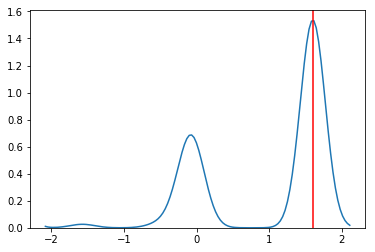

In [9]:
sns.distplot(sh2,hist=False)
plt.axvline(x=math.fmod(PH,2*np.pi),color='r')
plt.xlim()
plt.show()

In [10]:
from scipy import stats
PP = stats.mode(sh2, axis=None)[0][0]

print("Mode of SH2 = {:.10f}, Actual shift = {:.10f}, Error % = {:.7e},".format(PP,PH,100*((np.abs(PP)-np.abs(PH)))/(PH)))

Mode of SH2 = 1.6000000000, Actual shift = 1.6000000000, Error % = 0.0000000e+00,


We now repeat the process for shifts from 0 to 2pi in 20000 incriments

In [11]:
error = np.zeros(2000)
errorD = np.zeros(2000)
Pstore = np.zeros(100)
IP=0
ID=0
J=0
for I in range(0,2000):
    if I ==0:
        continue
    PH = (2*np.pi/2000)*I
    
    u = myZ
    phi0 = np.arctan2(myZ[:,:].imag,myZ[:,:].real)

    unew = u*np.exp(-1j*PH*p.kx)
    phiT = np.arctan2(unew[:,:].imag,unew[:,:].real)
    
    s0 = 0
    L = 0

    for i in range(128):
        for j in range(64):
            if p.kx[i,j] ==1 and abs(u[i,j]) > 0:
                s0 = s0 + math.fmod(phi0[i,j]-phiT[i,j]+2*np.pi,2*np.pi)*ikx[i,j]
                L+=1
    
    nn = (p.kx*(s0/L) -(phi0-phiT))/(2*np.pi)
    Nn = np.zeros(np.shape(nn))
    
    for i in range(128):
        for j in range(64):
            if abs(u[i,j]) > 0:
                Nn[i,j] = np.round(nn[i,j])
    
    s = ((phi0-phiT) + Nn*2*np.pi)*ikx
    
    sh = np.zeros(np.size(s))
    
    p1=0
    for i in range(np.shape(s)[0]):
        for j in range(np.shape(s)[1]):
            if ikx[i,j] !=0: 
                sh[p1] = math.fmod(s[i,j],2*np.pi)
                p1+=1
    sh1 = sh[0:p1]

    sh2= sh1[np.nonzero(sh1)]
    
    PP = stats.mode(sh2, axis=None)[0][0]
    
    error[IP] = 100*(PP-PH)/(PH)
    errorD[ID] = PP-PH
    
    if np.abs(error[IP])>=1e-10:
        
        Pstore[J]=PH   
              
    IP +=1
    ID +=1

## A percentage error 

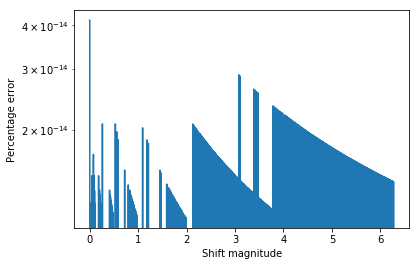

In [12]:
Yax = np.arange(0,2000,1)

plt.semilogy(Yax*2*np.pi/2000,np.abs(error))
plt.xlim()
plt.ylabel('Percentage error')
plt.xlabel('Shift magnitude')
plt.show()

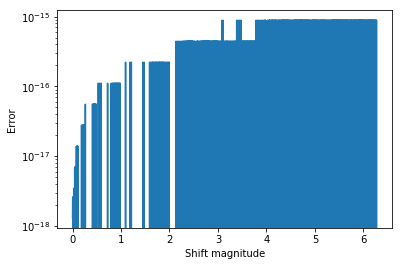

In [13]:
plt.semilogy(Yax*2*np.pi/2000,np.abs(errorD))
plt.xlim()
plt.ylabel('Error')
plt.xlabel('Shift magnitude')
plt.show()